In [1]:
%matplotlib inline

from pycocotools.coco import COCO
import os
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pickle
from nltk.corpus import wordnet as wn
plt.rcParams['figure.figsize'] = (10, 8)
from CaptionSaliency import CaptionSaliency as CS

In [2]:
dataType='train2014'
usingSet='10000coco'
dataDir='H:/SG_code/Dataset/COCO/tools'
savefileDir = 'data'

CapSal_train = CS(dataType,usingSet,dataDir,savefileDir)

# dataType='val2014'
# usingSet='5000coco'
# CapSal_val = CS(dataType,usingSet,dataDir,savefileDir)


loading annotations into memory...
0:00:18.356000
creating index...
index created!
loading annotations into memory...
0:00:02.473000
creating index...
index created!


In [3]:
# CapSal_val.compute_distance()
CapSal_train.compute_distance()

data already exist, loading...
caption saliency value loaded...!


In [4]:
CapSal_train.factored()

Start to calculate factors...
Done!.
Assigning salient value...
salient value computed.!


In [5]:
CapSal_train.save_saldict_tomatfile(CapSal_train.saliencydict_i,'save/tfidf_sal.mat')
CapSal_train.save_saldict_tomatfile(CapSal_train.saliencydict_c,'save/cardi_sal.mat')
CapSal_train.save_saldict_tomatfile(CapSal_train.saliencydict_s,'save/seque_sal.mat')

In [5]:
import matplotlib.gridspec as gridspec
s1 = CapSal_train.imsal_dict
s2= CapSal_train.saliencydict_i
s3 = CapSal_train.saliencydict_s

[4405, 4805, 5220, 5877]
[[-0.80295507]
 [-0.8660254 ]
 [-0.7781191 ]
 [-0.8       ]]


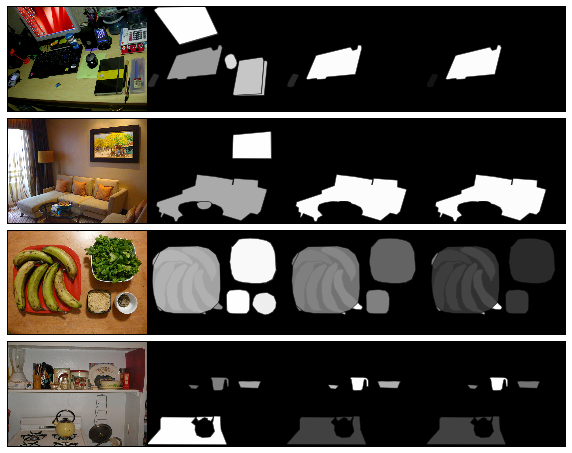

In [82]:
# c = 116
# show_id = score_reverse[c:c+4:1]
show_id = [4405,4805,5220,5877]
print show_id
print score[show_id]
gs = gridspec.GridSpec(len(show_id), 4)
gs.update(wspace=0,hspace=0)

for i in range(4):
    ax = plt.subplot(gs[i,0])
    CapSal_train.show_im(show_id[i])
    ax.set_xticks([])
    ax.set_yticks([])

    ax = plt.subplot(gs[i,1])
    CapSal_train.plot_saliencymap(s1,show_id[i])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = plt.subplot(gs[i,2])
    CapSal_train.plot_saliencymap(s2,show_id[i])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = plt.subplot(gs[i,3])
    CapSal_train.plot_saliencymap(s3,show_id[i])
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig('save/figure6_3',dpi=160)

In [9]:
score = sio.loadmat('data/score.mat')

In [10]:
score = score['score']

In [11]:
score_intimate=[]
score_noc = []
score_reverse = []
for i in range(10000):
    s = score[i][0]
    if s > 0.7:
        score_intimate.append(i)
    if s > -0.1 and s < 0.1:
        score_noc.append(i)
    if s <-0.7:
        score_reverse.append(i)

print len(score_intimate)
print len(score_noc)
print len(score_reverse)

2888
751
192


In [110]:
score_intimate[0:4:1]

[3, 5, 6, 11]

In [20]:
CapSal_train.SALICON['SALICON_filename'][1485]

'COCO_train2014_000000086655.jpg'

A man holding out a cell phone with a bar code scanning app on pulled up.
Man holding up his cell phone to display app.
A man showing an app he has on his phone.
A man dispaying the screen and a web sight on his cellphone.
a man showing his motorola cell phone app


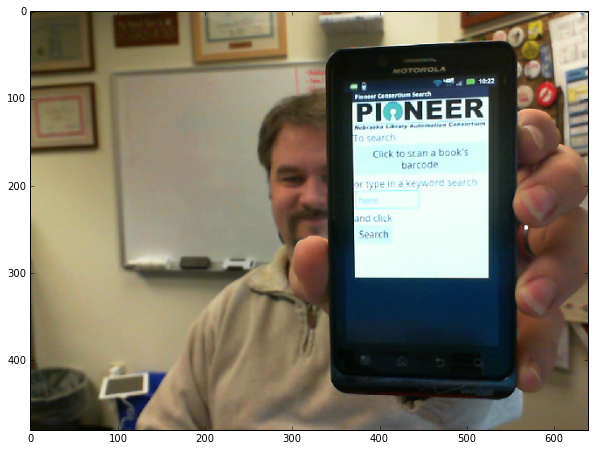

In [19]:
CapSal_train.show_im(1485)
CapSal_train.show_cap(1485)

In [42]:
f5_c = [3,13,16,45,110,140,142,167,377]
f5_c_score = score[f5_c]
f5_b =[21,84,1968,2274,700,982,1658,1754]
f5_b_score = score[f5_b]
f5_a = [527,975,1300,1396,1485,1706,2156,3073]
f5_a_score = score[f5_a]

In [45]:
f5_c_score

array([[ 1.        ],
       [ 1.        ],
       [ 0.73786479],
       [ 0.87426717],
       [ 1.        ],
       [ 2.        ],
       [ 1.        ],
       [ 0.70418685],
       [ 0.72294404]])

In [8]:
import scipy.io as sio 

imsal = sio.loadmat('data/sal_10k.mat')
imsal  = imsal['sal_10k']

In [47]:
imsal_dict = {}
for ind, item in enumerate(imsal):
    sal_dict = {}
    for obj in item[0]:
        index = int(obj[0])
        val = obj[1]
        sal_dict[index] = val
    imsal_dict[ind] = sal_dict
    

pickle.dump(imsal_dict,open('data/imsal_dict.p','wb'))

In [46]:
imsal_dict

{0: {1038967: 0.8901960784313725,
  1039564: 1.0,
  1058555: 0.8901960784313725,
  1534147: 0.62352941176470589,
  1913551: 0.81176470588235294,
  1913746: 0.80392156862745101,
  1913856: 1.0,
  1914001: 0.50980392156862742}}

In [53]:
from skimage.draw import polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon







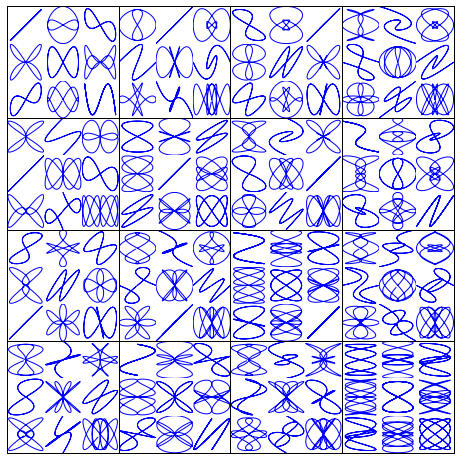

In [11]:
import matplotlib.gridspec as gridspec
def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

try:
    from itertools import product
except ImportError:
    # product is new in v 2.6
    def product(*args, **kwds):
        pools = map(tuple, args) * kwds.get('repeat', 1)
        result = [[]]
        for pool in pools:
            result = [x+[y] for x in result for y in pool]
        for prod in result:
            yield tuple(prod)


fig = plt.figure(figsize=(8, 8))

# gridspec inside gridspec
outer_grid = gridspec.GridSpec(4, 4, wspace=0.0, hspace=0.0)

for i in range(16):
    inner_grid = gridspec.GridSpecFromSubplotSpec(3, 3,
            subplot_spec=outer_grid[i], wspace=0.0, hspace=0.0)
    a, b = int(i/4)+1,i%4+1
    for j, (c, d) in enumerate(product(range(1, 4), repeat=2)):
        ax = plt.Subplot(fig, inner_grid[j])
        ax.plot(*squiggle_xy(a, b, c, d))
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

all_axes = fig.get_axes()

#show only the outside spines
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)
    if ax.is_first_row():
        ax.spines['top'].set_visible(True)
    if ax.is_last_row():
        ax.spines['bottom'].set_visible(True)
    if ax.is_first_col():
        ax.spines['left'].set_visible(True)
    if ax.is_last_col():
        ax.spines['right'].set_visible(True)

plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()  
counts = [[3, 0, 1],          [2, 0, 0],      [3, 0, 0],          [4, 0, 0],        [3, 2, 0],         [3, 0, 2]]

tfidf = transformer.fit_transform(counts)
print tfidf.toarray()
tfidf = transformer.fit_transform(tfidf)
tfidf.toarray()

[[ 0.85151335  0.          0.52433293]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 0.55422893  0.83236428  0.        ]
 [ 0.63035731  0.          0.77630514]]


array([[ 0.66025469,  0.        ,  0.75104177],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.28344792,  0.95898763,  0.        ],
       [ 0.40240053,  0.        ,  0.91546372]])